In [20]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer


In [21]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
import spacy


In [13]:

import sys
print(sys.executable)

C:\Users\SHREYA JHA\anaconda3\python.exe


In [27]:
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [29]:
from xgboost import XGBClassifier




In [30]:
from transformers import pipeline

In [31]:
df = pd.read_csv(r"C:\Users\SHREYA JHA\1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [33]:
data = df[["reviews.text","reviews.rating"]]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [35]:
# drop missing values
data.dropna(inplace=True)
data.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [36]:
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
Works really well only wish it had larger memory for streaming better on slower network 

RATE:
4.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Greatest thing since sliced bread. My wife's jealous! :) 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Bottom LED lighting is a bit uneven, and a bit distracting, but the overall package is otherwise excellent for reading, and without all the tempting distractions on a conventional tablet, so one can really focus on reading. The 300ppi is really crucial for images and especially maps and diagrams. 

RATE:
4.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
The tablet is easy to use and has nice features. It is small enough to carry around. 

RATE:
5.0

 -------------------------------------------------------------------------------------

In [37]:
data.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [38]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

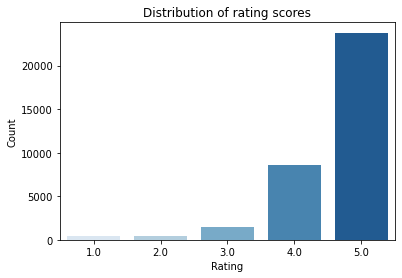

In [39]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [40]:
data2 = pd.read_csv(r"C:\Users\SHREYA JHA\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [41]:
data2 = data2[['reviews.text', 'reviews.rating']]
# use only data of rating lower than or equal to 3
data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True) # reset index after filtering rows


In [42]:
data3 = pd.read_csv(r"C:\Users\SHREYA JHA\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data3 = data3[['reviews.text', 'reviews.rating']]
# use only data of rating lower than or equal to 3
data3 = data3[data3["reviews.rating"] <= 3].reset_index(drop=True) # reset index after filtering rows

In [43]:
data2['reviews.rating'].value_counts().sort_index(ascending=False)

3    197
2     54
1     63
Name: reviews.rating, dtype: int64

In [44]:
data3['reviews.rating'].value_counts().sort_index(ascending=False)

3    1206
2     616
1     965
Name: reviews.rating, dtype: int64

In [45]:
# concatenation
data = pd.concat([data, data2, data3])

# assert data.shape[0] == data.shape[0] + data2.shape[0] + data3.shape[0]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [46]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     2902
2.0     1072
1.0     1438
Name: reviews.rating, dtype: int64

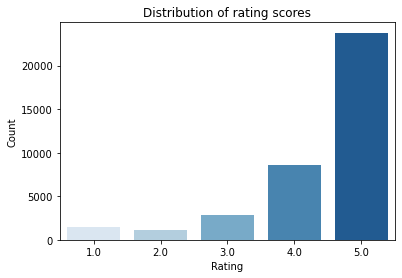

In [47]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [48]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


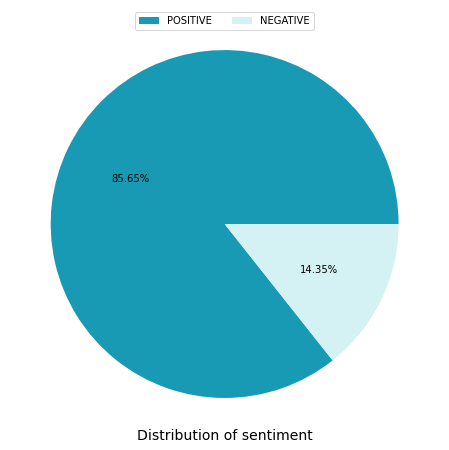

In [49]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [50]:
# get all used words 
all_words = pd.Series(' '.join(data['reviews.text']).split())

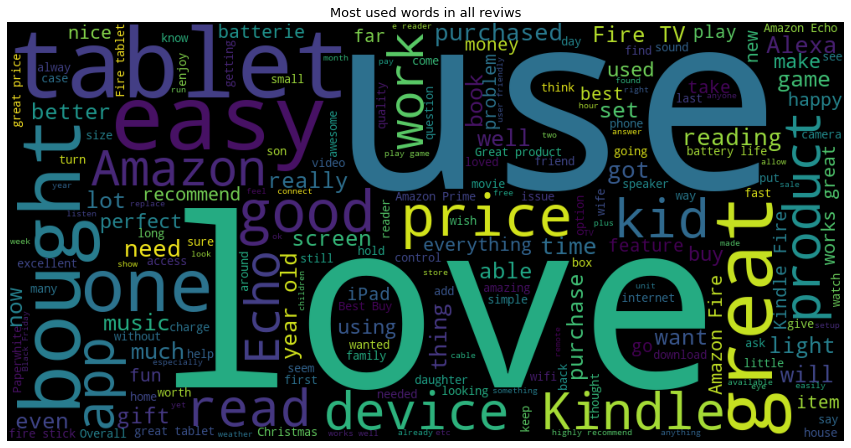

In [51]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=13)

plt.axis("off")
plt.show()

In [52]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

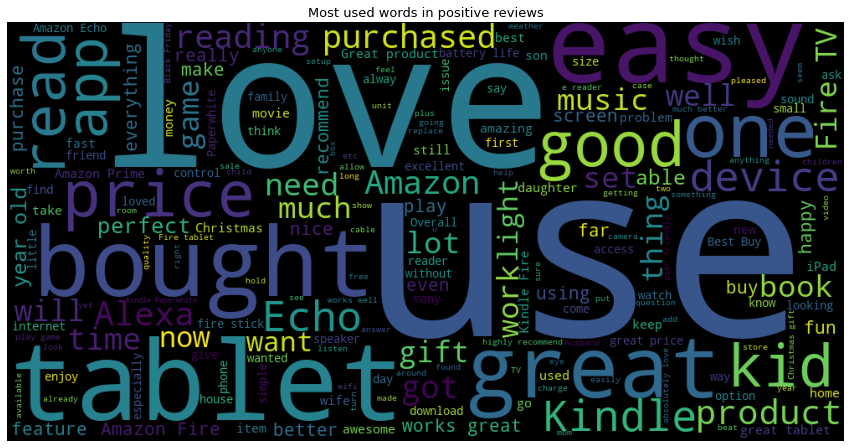

In [53]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=13)

plt.axis("off")
plt.show()

In [54]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

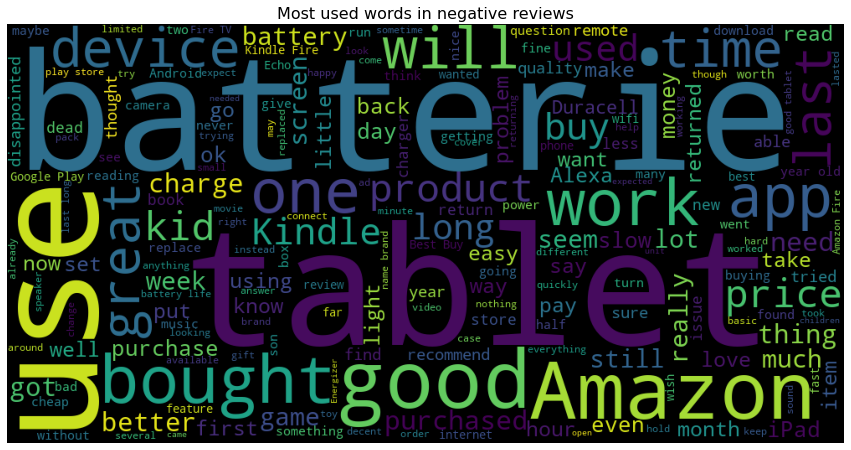

In [59]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [55]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [56]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'

In [57]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [58]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)


   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SHREYA
[nltk_data]     JHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
remove_stopwords(text)

'message be cleaned may involve some things like adjacent spaces tabs'

In [61]:
def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    return text

In [62]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
stemm_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'messag be clean may involv some thing like adjac space tab'

In [63]:
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [64]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    return lemmatized_text

In [65]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHREYA JHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\SHREYA
[nltk_data]     JHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
# text = stemm_text(text)
lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

In [67]:
# clean text
data['text'] = data['reviews.text'].apply(clean_text)
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)
# lemmatize
data['text'] = data['text'].apply(lemmatize)

In [68]:
# check some processed reviews
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")

Original review: 
We have been using our Kindle Fire 7 for years and it wore out. We looked at replacing it with another Fire 7 until I saw the Fire 8. The display is great and the weight is not that big of a difference.

Processed review: 
we have be use our kindle fire for year wore out we look at replace with another fire until i saw fire display great weight not big of difference


In [69]:
data.to_csv('cleaned_data.csv', index=False)


In [70]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37727 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37727 non-null  object 
 1   reviews.rating   37727 non-null  float64
 2   sentiment_score  37727 non-null  int64  
 3   sentiment        37727 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [72]:
data[data['text'].isnull()]

,reviews.text,reviews.rating,sentiment_score,sentiment,text
9681,.................................................,5.0,1,POSITIVE,NaN


In [73]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37726 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37726 non-null  object 
 1   reviews.rating   37726 non-null  float64
 2   sentiment_score  37726 non-null  int64  
 3   sentiment        37726 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB


In [74]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.31997416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.10056087, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [75]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,would,wouldn,wrong,year,yet,you,young,your,youtube,yr
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075228,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.117444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068385,0.0,0.0,0.0,0.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(30180, 700)
Test set shape	:(7546, 700)


In [77]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.075228,0.0,0.0,0.0,0.0,1.0
5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.16796,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [78]:
train_data['sentiment_score'].value_counts()

1.0    25902
0.0     4278
Name: sentiment_score, dtype: int64

In [79]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
35038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
31352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
35168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.122124,0.0,0.0,0.0,0.131067,0.0,0.0,0.0
13363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
23852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0


In [80]:
df_train_over.dropna(inplace=True)

In [81]:
df_train_over['sentiment_score'].value_counts()

1.0    22189
0.0    21427
Name: sentiment_score, dtype: int64

In [82]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

In [83]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

              precision    recall  f1-score   support

           0       0.46      0.77      0.57      1134
           1       0.95      0.84      0.89      6412

    accuracy                           0.83      7546
   macro avg       0.71      0.80      0.73      7546
weighted avg       0.88      0.83      0.84      7546

AUC  0.803720647243209


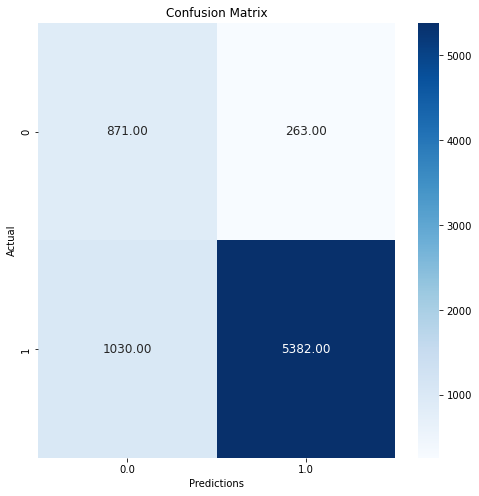

In [84]:
modeling(MultinomialNB())

[20:39:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1134
           1       0.96      0.91      0.93      6412

    accuracy                           0.89      7546
   macro avg       0.78      0.84      0.81      7546
weighted avg       0.91      0.89      0.90      7546

AUC  0.8414084702294309


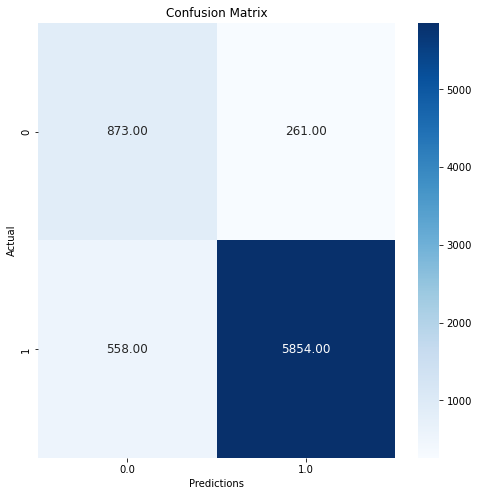

In [85]:
modeling(XGBClassifier());

In [86]:
import tensorflow


In [6]:
# Build sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [7]:
import tensorflow as tf
print(tf.version.VERSION)

2.8.0


In [87]:
# test
sentiment_analyzer(['Good product', 'Bad custemer service'])

[{'label': 'POSITIVE', 'score': 0.9998588562011719},
 {'label': 'NEGATIVE', 'score': 0.999789297580719}]

In [88]:
def transformer_check(n=1000):
    """ Return Dataframe of reviews sentimental prediction and actual sentimental"""
    res_list = []
    for _ in range(n):
        res_dict = {}
        i = random.choice(range(len(data)))
        text_ = data['text'].iloc[i]
        sen_act = data['sentiment'].iloc[i]
        sen_pred = sentiment_analyzer(text_)[0]['label']
        res_dict['review'] = text_
        res_dict['sen_act'] = sen_act
        res_dict['sen_pred'] = sen_pred
        res_dict['match'] = sen_act == sen_pred
        
        res_list.append(res_dict)
        
    return pd.DataFrame(res_list)


In [89]:
results = transformer_check()

In [90]:
results.sample(10)

,review,sen_act,sen_pred,match
160,very pleased i purchase echo dot but not reall...,POSITIVE,NEGATIVE,False
930,my wife love good than samsung galaxy tab she ...,POSITIVE,POSITIVE,True
322,hubby buy for u we use play music check daily ...,POSITIVE,NEGATIVE,False
65,my son be very pleased with kindle will read m...,POSITIVE,POSITIVE,True
429,excellent product at great price perfect for m...,POSITIVE,POSITIVE,True
321,voice recognition have come long way really am...,POSITIVE,POSITIVE,True
128,our family stream movie tv from amazon direct ...,POSITIVE,POSITIVE,True
547,i think best table for read book just browse net,POSITIVE,NEGATIVE,False
427,nice processor power be never problem with ori...,POSITIVE,NEGATIVE,False
175,so far we like we ve not really have lot of lu...,POSITIVE,NEGATIVE,False
